# Fan Classification Model

A jupyter notebook to create the classification model for the fan machines.


### Getting the dataset

First is to import the necessary libraries needed

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

Then import the dataset. This dataset was extracted from the sound files.

In [35]:
df = pd.read_csv('../datasets/pump_full_features.csv')

In [36]:
df

,Unnamed: 0,Type of SNR,Type of Machine,Model Number,Status,File Name,y,SR,y mean,y max,...,spectral_centroid std,spec_bw std,spec_contrast std,flatness std,rolloff std,poly_0 std,poly_1 std,poly_2 std,tonnetz std,zero_crossing_rate std
0,0,6_dB_pump,pump,id_00,abnormal,00000000.wav,[ 2.4361629e-03 2.1362563e-03 -2.8742070e-04 ...,22050,-6.878514e-07,0.093844,...,253.509832,163.432486,18.084111,0.000613,607.115274,0.044482,0.212262,0.333314,0.049982,0.017733
1,1,6_dB_pump,pump,id_00,abnormal,00000001.wav,[ 0.00168448 0.00068392 -0.00026477 ... -0.00...,22050,2.900213e-07,0.092846,...,212.172917,135.049239,18.118440,0.000322,494.741786,0.038391,0.217738,0.344670,0.041798,0.014099
2,2,6_dB_pump,pump,id_00,abnormal,00000002.wav,[-0.00567724 -0.0069852 -0.00647624 ... 0.00...,22050,-7.791660e-07,0.091343,...,216.937724,144.161401,18.113436,0.000392,514.221513,0.029347,0.194379,0.305414,0.042152,0.016363
3,3,6_dB_pump,pump,id_00,abnormal,00000003.wav,[ 0.00511618 0.00385834 0.00169142 ... -0.00...,22050,-1.037314e-06,0.135227,...,251.318545,156.669899,18.074153,0.000916,563.620304,0.039003,0.209279,0.327744,0.044756,0.019558
4,4,6_dB_pump,pump,id_00,abnormal,00000004.wav,[-0.0111747 -0.01306265 -0.01071244 ... -0.01...,22050,-4.341130e-07,0.087814,...,214.036541,136.836732,18.318521,0.000361,494.265992,0.033735,0.217196,0.343454,0.045100,0.017338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12610,4200,-6_dB_pump,pump,id_06,normal,00001031.wav,[-2.2149065e-03 -1.5423764e-03 -6.7925267e-04 ...,22050,-1.119335e-06,0.047295,...,58.318996,42.969079,17.115869,0.000044,176.509032,0.005318,0.154774,0.266499,0.039479,0.005255
12611,4201,-6_dB_pump,pump,id_06,normal,00001032.wav,[ 0.00817731 0.01202268 0.01378764 ... -0.00...,22050,-1.648288e-06,0.040103,...,98.871317,82.863513,19.721246,0.000688,339.371575,0.012998,0.173246,0.239080,0.041034,0.013610
12612,4202,-6_dB_pump,pump,id_06,normal,00001033.wav,[ 0.00356876 0.00479036 0.00185625 ... -0.00...,22050,2.341846e-07,0.039499,...,70.948239,33.649749,19.484580,0.000569,141.916079,0.006945,0.171896,0.262957,0.033895,0.008998
12613,4203,-6_dB_pump,pump,id_06,normal,00001034.wav,[-1.1107471e-03 -8.4548417e-05 3.6526336e-03 ...,22050,-1.663233e-06,0.041179,...,81.910632,43.455964,18.366189,0.000569,121.012773,0.011265,0.175184,0.262265,0.055764,0.012991


In [37]:
df.shape

(12615, 76)

In [38]:
df.columns

Index(['Unnamed: 0', 'Type of SNR', 'Type of Machine', 'Model Number',
       'Status', 'File Name', 'y', 'SR', 'y mean', 'y max', 'y min',
       'chroma_stft min', 'chroma_stft mean', 'chroma_stft max',
       'chroma_cqt min', 'chroma_cqt mean', 'chroma_cqt max',
       'chroma_cens min', 'chroma_cens mean', 'chroma_cens max',
       'melspectogram min', 'melspectogram mean', 'melspectogram max',
       'mfcc min', 'mfcc mean', 'mfcc max', 'rms min', 'rms mean', 'rms max',
       'spectral_centroid min', 'spectral_centroid mean',
       'spectral_centroid max', 'spec_bw min', 'spec_bw mean', 'spec_bw max',
       'spec_contrast min', 'spec_contrast mean', 'spec_contrast max',
       'flatness min', 'flatness mean', 'flatness max', 'rolloff min',
       'rolloff mean', 'rolloff max', 'poly_0 min', 'poly_0 mean',
       'poly_0 max', 'poly_1 min', 'poly_1 mean', 'poly_1 max', 'poly_2 min',
       'poly_2 mean', 'poly_2 max', 'tonnetz min', 'tonnetz mean',
       'tonnetz max', 'zero_c

Then we only use the features that we needed and save it as df1.

In [39]:
df1 = df[[ 'y mean', 'y max', 'y min', 'chroma_stft min',
       'chroma_stft mean', 'chroma_stft max', 'chroma_cqt min',
       'chroma_cqt mean', 'chroma_cqt max', 'chroma_cens min',
       'chroma_cens mean', 'chroma_cens max', 'melspectogram min',
       'melspectogram mean', 'melspectogram max', 'mfcc min', 'mfcc mean',
       'mfcc max', 'rms min', 'rms mean', 'rms max', 'spectral_centroid min',
       'spectral_centroid mean', 'spectral_centroid max', 'spec_bw min',
       'spec_bw mean', 'spec_bw max', 'spec_contrast min',
       'spec_contrast mean', 'spec_contrast max', 'flatness min',
       'flatness mean', 'flatness max', 'rolloff min', 'rolloff mean',
       'rolloff max', 'poly_0 min', 'poly_0 mean', 'poly_0 max', 'poly_1 min',
       'poly_1 mean', 'poly_1 max', 'poly_2 min', 'poly_2 mean', 'poly_2 max',
       'tonnetz min', 'tonnetz mean', 'tonnetz max', 'zero_crossing_rate min',
       'zero_crossing_rate mean', 'zero_crossing_rate max', 'y std',
       'chroma_stft std', 'chroma_cqt std', 'chroma_cens std',
       'melspectogram std', 'mfcc std', 'rms std', 'spectral_centroid std',
       'spec_bw std', 'spec_contrast std', 'flatness std', 'rolloff std',
       'poly_0 std', 'poly_1 std', 'poly_2 std', 'tonnetz std',
       'zero_crossing_rate std']].copy()

And change the Status column to binary.

In [5]:
df['Status'].replace({'abnormal' : 1, 'normal' : 0}, inplace=True)

We can clearly see here that there is an unbalance targets. Almost a ratio of 1 abnormal is to 11 normal.

In [6]:
df['Status'].value_counts()

0    11247
1     1368
Name: Status, dtype: int64

Now we assign the df1 as the features (X) and the Status column as the target (y).

In [7]:
X = df1.values
y = df['Status'].values
X.shape, y.shape

((12615, 68), (12615,))

Now that we have the features and target, we can now divide the dataset to 3, training, test and validation set. 

### Divide the data into Training, Test and Validation Set

We will use the `train_test_split` from sklearn to divide the data to three sets.


We will take 10% of the data as the validation set.

In [47]:
X_model, X_validate, y_model, y_validate = train_test_split(X,y,test_size=0.1,random_state = 40)

And then from the remaining 90% we get the 20% for the testing set. 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_model,y_model,test_size=0.15,random_state = 40)

Based from our exploration, `RandomForestClassifier` is best used for this classification model so here we named it as `rf` to create the model.  

In [49]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9571344685848503

Checking the classification report on the test set.

In [50]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1523
           1       0.97      0.62      0.75       180

    accuracy                           0.96      1703
   macro avg       0.96      0.81      0.86      1703
weighted avg       0.96      0.96      0.95      1703



Checking the classification report on the validation set.

In [52]:
validation = rf.predict(X_validate)
print(classification_report(y_validate,validation))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1120
           1       0.98      0.57      0.72       142

    accuracy                           0.95      1262
   macro avg       0.96      0.78      0.85      1262
weighted avg       0.95      0.95      0.94      1262



Plotting the feature importance to have a visual on the features.

y min
spec_bw max
poly_0 max
poly_1 min
poly_1 max
poly_2 min
poly_2 max
melspectogram std
mfcc std
spec_bw std
rolloff std
poly_1 std
poly_2 std


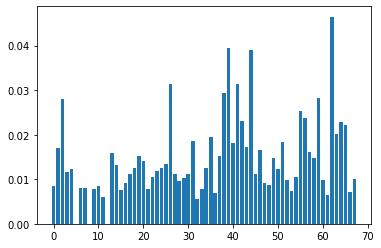

In [53]:
from matplotlib import pyplot
importance = rf.feature_importances_
for i,v in enumerate(importance):
    if v > 0.022:
        #print(f'Feature: {df1.columns[i]}, Score: {v:.5f}')
        print(df1.columns[i])
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Resampling the data using SMOTE

Trying to do oversampling using SMOTE to even the number of normal and abnormal on the target.

In [54]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Then use again the `RandomForestClassifier` to train the model.

In [56]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train_res, y_train_res)
rf.score(X_test, y_test)

0.9559600704638873

Checking the predictions on the `X_test`.

In [57]:
y_test_pred = rf.predict(X_test)

Checking the True Positive and True Negative using `pd.crosstab` for the test dataset predictions.

In [58]:
pd.crosstab(pd.Series(y_test_pred, name = 'Predicted'),
           pd.Series(y_test, name='Actual'))

Actual,0,1
Predicted,,
0,1488,40
1,35,140


Printing the classification report on the test data set. 

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1523
           1       0.80      0.78      0.79       180

    accuracy                           0.96      1703
   macro avg       0.89      0.88      0.88      1703
weighted avg       0.96      0.96      0.96      1703



Now let us check the model on the validation set.

In [60]:
validation_set = rf.predict(X_validate)

Then also check the True Positive and True Negative for the validation set. 

In [62]:
pd.crosstab(pd.Series(validation_set, name = 'Predicted'),
           pd.Series(y_validate, name='Actual'))

Actual,0,1
Predicted,,
0,1105,39
1,15,103


Then print the classification report for the validation set.

In [63]:
print(classification_report(y_validate,validation_set))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1120
           1       0.87      0.73      0.79       142

    accuracy                           0.96      1262
   macro avg       0.92      0.86      0.88      1262
weighted avg       0.96      0.96      0.96      1262



Then saving the model using the `pickle.dump` function.

In [22]:
filename = '../Models/pump_model.sav'
pickle.dump(rf, open(filename, 'wb'))


And now we have the model for pump. :)